## Evaluating the Model in R

- **Kernel**: `R`

In [1]:
weight_and_bias <- readRDS(file="tmp/weight_and_bias")

In [2]:
weight_and_bias

$weight
[1] 7.446002

$bias
[1] 897.0424

In [7]:
manual_predict <- function(x, params=weight_and_bias) {     
    return(params$weight * x + params$bias)
}

In [8]:
manual_predict(42)

[1] 1209.774

In [18]:
df.test_data <- readRDS("tmp/df.test_data")

In [19]:
df.test_data

,last_name,management_experience_months,monthly_salary
,<chr>,<int>,<int>
3,Brown,38,1290
11,Chen,14,1090
12,Kim,67,1340
13,Davis,29,1170
14,James,49,1390
15,Perez,46,1240


In [9]:
regression_line_df <- data.frame(management_experience_months=0:120, monthly_salary=manual_predict(0:120))

In [10]:
regression_line_df

management_experience_months,monthly_salary
<int>,<dbl>
0,897.0424
1,904.4884
2,911.9344
3,919.3804
4,926.8264
5,934.2724
6,941.7184
7,949.1644
8,956.6104


In [13]:
df.all_data <- readRDS("tmp/df.all_data")
df.all_data

last_name,management_experience_months,monthly_salary
<chr>,<int>,<int>
Taylor,65,1630
Wang,61,1330
Brown,38,1290
Harris,71,1480
Jones,94,1590
Garcia,93,1750
Williams,15,1020
Lee,56,1290
White,59,1430


In [ ]:
library('ggplot2')
options(repr.plot.width=8, repr.plot.height=8)

In [ ]:
regression_line_part = geom_line(
    data = regression_line_df, 
    aes(
        x=management_experience_months, 
        y=monthly_salary), 
    color="blue", size=1)

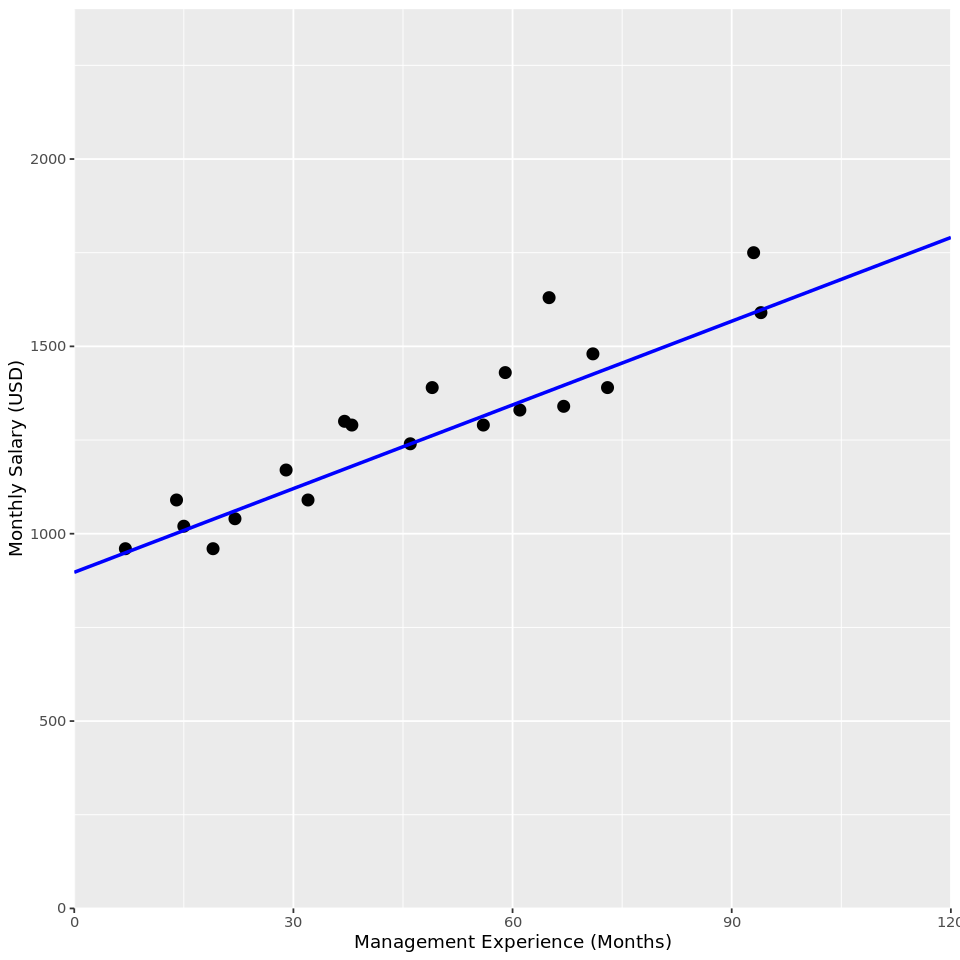

In [16]:
gg.list <- list(
    ggplot(
        df.all_data, 
        aes(
            x=management_experience_months, 
            y=monthly_salary)),
    geom_point(size = 3),
    regression_line_part,
    expand_limits(x = 0, y = 0),
    scale_x_continuous(
        expand = c(0, 0), 
        limits = c(0,120)), 
    scale_y_continuous(
        expand = c(0, 0), 
        limits = c(0,2400)), 
    labs(y="Monthly Salary (USD)", 
         x = "Management Experience (Months)")) 

Reduce("+", gg.list)

In [17]:
install.packages("Metrics") 
library(Metrics)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [20]:
test.pred <- manual_predict(df.test_data$management_experience_months)

In [21]:
test.pred

[1] 1179.990 1001.286 1395.925 1112.976 1261.896 1239.558

In [22]:
rmse(df.test_data$monthly_salary, test.pred)  

[1] 84.42169

In [23]:
mse(df.test_data$monthly_salary, test.pred)

[1] 7127.022

In [24]:
mae(df.test_data$monthly_salary, test.pred)

[1] 73.36936